In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU Device not found')
print('Found GPU at: {}'.format(device_name))

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import io
import datetime

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Split training set into new training set and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Preprocess data
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_val = np_utils.to_categorical(y_val, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

print("Shape of x_train is ", x_train.shape)
print("Shape of y_train is ", y_train.shape)
print("Shape of x_val is ", x_val.shape)
print("Shape of y_val is ", y_val.shape)
print("Shape of x_test  is ", x_test.shape)
print("Shape of y_test  is", y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
Shape of x_train is  (40000, 32, 32, 3)
Shape of y_train is  (40000, 10)
Shape of x_val is  (10000, 32, 32, 3)
Shape of y_val is  (10000, 10)
Shape of x_test  is  (10000, 32, 32, 3)
Shape of y_test  is (10000, 10)


In [ ]:
# Define CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Define data augmentation generator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)

In [ ]:
# create data generators for training data
batch_size = 64
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                        

In [ ]:
# Train model with data augmentation with 100 epochs
history = model.fit(train_generator,
                    steps_per_epoch=len(x_train) / 64, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
625/625 [==============================] - 528s 837ms/step - loss: 2.1074 - accuracy: 0.3075 - val_loss: 1.5855 - val_accuracy: 0.4466
Epoch 2/50
625/625 [==============================] - 463s 740ms/step - loss: 1.4945 - accuracy: 0.4651 - val_loss: 1.4097 - val_accuracy: 0.5283
Epoch 3/50
625/625 [==============================] - 446s 713ms/step - loss: 1.3041 - accuracy: 0.5385 - val_loss: 1.6009 - val_accuracy: 0.5305
Epoch 4/50
625/625 [==============================] - 468s 749ms/step - loss: 1.1705 - accuracy: 0.5936 - val_loss: 1.1548 - val_accuracy: 0.6110
Epoch 5/50
625/625 [==============================] - 519s 830ms/step - loss: 1.0915 - accuracy: 0.6227 - val_loss: 0.9986 - val_accuracy: 0.6497
Epoch 6/50
625/625 [==============================] - 529s 847ms/step - loss: 1.0125 - accuracy: 0.6522 - val_loss: 0.9398 - val_accuracy: 0.6871
Epoch 7/50
625/625 [==============================] - 526s 842ms/step - loss: 0.9507 - accuracy: 0.6770 - val_loss: 0.8622 -

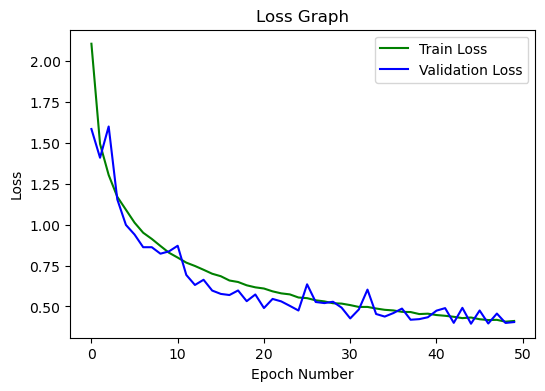

In [ ]:
plt.subplots(figsize=(6,4))
plt.plot(history.epoch,history.history["loss"],color="green",label="Train Loss")
plt.plot(history.epoch,history.history["val_loss"],color="blue",label="Validation Loss")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Graph")
plt.show()

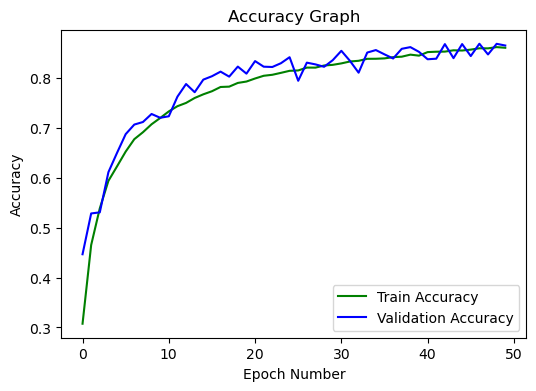

In [ ]:
plt.subplots(figsize=(6,4))
plt.plot(history.epoch,history.history["accuracy"],color="green",label="Train Accuracy")
plt.plot(history.epoch,history.history["val_accuracy"],color="blue",label="Validation Accuracy")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Graph")
plt.show()

In [ ]:
# Train model with data augmentation with 100 epochs
history = model.fit(train_generator,
                    steps_per_epoch=len(x_train) / 64, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
625/625 [==============================] - 470s 746ms/step - loss: 0.3952 - accuracy: 0.8658 - val_loss: 0.3863 - val_accuracy: 0.8724
Epoch 2/50
625/625 [==============================] - 462s 739ms/step - loss: 0.3964 - accuracy: 0.8653 - val_loss: 0.4020 - val_accuracy: 0.8688
Epoch 3/50
625/625 [==============================] - 504s 806ms/step - loss: 0.3909 - accuracy: 0.8680 - val_loss: 0.3727 - val_accuracy: 0.8753
Epoch 4/50
625/625 [==============================] - 510s 816ms/step - loss: 0.3873 - accuracy: 0.8680 - val_loss: 0.4030 - val_accuracy: 0.8679
Epoch 5/50
625/625 [==============================] - 520s 832ms/step - loss: 0.3891 - accuracy: 0.8687 - val_loss: 0.4178 - val_accuracy: 0.8606
Epoch 6/50
625/625 [==============================] - 510s 816ms/step - loss: 0.3910 - accuracy: 0.8681 - val_loss: 0.4241 - val_accuracy: 0.8612
Epoch 7/50
625/625 [==============================] - 465s 743ms/step - loss: 0.3855 - accuracy: 0.8690 - val_loss: 0.3656 -

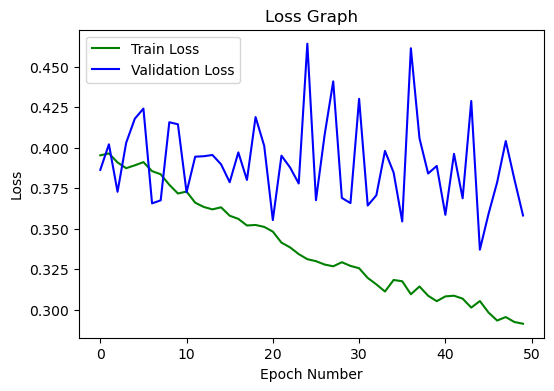

In [ ]:
plt.subplots(figsize=(6,4))
plt.plot(history.epoch,history.history["loss"],color="green",label="Train Loss")
plt.plot(history.epoch,history.history["val_loss"],color="blue",label="Validation Loss")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Graph")
plt.show()

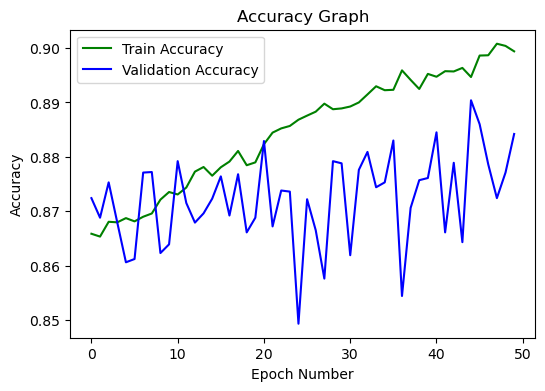

In [ ]:
plt.subplots(figsize=(6,4))
plt.plot(history.epoch,history.history["accuracy"],color="green",label="Train Accuracy")
plt.plot(history.epoch,history.history["val_accuracy"],color="blue",label="Validation Accuracy")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Graph")
plt.show()

In [ ]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy without attack: {:.4f}".format(test_acc))

Test accuracy without attack: 0.8777


In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/CNN_CIFAR10.h5")

In [ ]:
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Find the indices of the correctly predicted samples
correct_indices = np.nonzero(y_pred_classes == y_true_classes)[0]

313/313 [==============================] - 6s 15ms/step


In [ ]:
# Select a random sample of 2500 correctly predicted samples
num_samples = 2500
selected_indices = np.random.choice(correct_indices, num_samples, replace=False)
selected_images = x_test[selected_indices]
selected_labels = y_test[selected_indices]

print('Selected images shape:', selected_images.shape)
print('Selected labels shape:', selected_labels.shape)

# Save the selected images and labels
np.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/selected_images.npy', selected_images)
np.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/selected_labels.npy', selected_labels)

Selected images shape: (2500, 32, 32, 3)
Selected labels shape: (2500, 10)


In [ ]:
import tensorflow as tf
import numpy as np
import datetime

selected_images = np.load('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/selected_images.npy')
selected_labels = np.load('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/selected_labels.npy')
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/CNN_CIFAR10.h5")

**Generating Adversarial Examples using Fast Gradient Sign Method (FGSM)**

In [ ]:
# Define the FGSM attack function
def fgsm_attack(model, x, y, eps=0.1):
    """
    Implements the iterative fast gradient sign method (IFGSM) attack on a 
    given model.
    
    Args:
    - model: the target model to attack
    - x: a batch of input images to be attacked
    - y: the true labels for the input images
    - eps: the maximum perturbation that can be added to each pixel 
    (default: 0.1)
    
    Returns:
    - x_adv: the adversarial images generated by the attack
    """
    # Define the loss function
    loss_fn = tf.keras.losses.CategoricalCrossentropy()

    # Compute the gradient of the loss with respect to the input
    x_tensor = tf.convert_to_tensor(x)
    # Record the gradient tape
    with tf.GradientTape() as tape:
        tape.watch(x_tensor)
        y_pred = model(x_tensor)
        loss_value = loss_fn(y, y_pred)
    gradient = tape.gradient(loss_value, x_tensor)

    # Generate the adversarial examples with FGSM
    x_adv = x + eps * tf.sign(gradient)
    x_adv = tf.clip_by_value(x_adv, 0, 1)
    
    return x_adv

In [ ]:
# Perform the FGSM attack on the sample of test images
eps = 0.01
start_time = datetime.datetime.now()
adv_images = fgsm_attack(model, selected_images, selected_labels, eps)
end_time = datetime.datetime.now()
print('Time taken for FGSM attack (eps=0.01):', (end_time-start_time).total_seconds(), 'seconds')

# Save the adversarial images to a numpy file
#np.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_fgsm_loweps.npy', adv_images)

# Evaluate the accuracy of the classification on the original and perturbed images
acc_orig = model.evaluate(selected_images, selected_labels, verbose=0)[1]
acc_adv = model.evaluate(adv_images, selected_labels, verbose=0)[1]

print('Accuracy of benign images: {:4f}'.format(acc_orig))
print('Accuracy of adversarial examples: {:4f}'.format(acc_adv))

Time taken for FGSM attack (eps=0.01): 3.60785 seconds
Accuracy of benign images: 1.000000
Accuracy of adversarial examples: 0.329600


In [ ]:
# Perform the FGSM attack on the sample of test images
eps = 0.05
start_time = datetime.datetime.now()
adv_images = fgsm_attack(model, selected_images, selected_labels, eps)
end_time = datetime.datetime.now()
print('Time taken for FGSM attack (eps=0.05):', (end_time-start_time).total_seconds(), 'seconds')

# Save the adversarial images to a numpy file
#np.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_fgsm_loweps.npy', adv_images)

# Evaluate the accuracy of the classification on the original and perturbed images
acc_orig = model.evaluate(selected_images, selected_labels, verbose=0)[1]
acc_adv = model.evaluate(adv_images, selected_labels, verbose=0)[1]

print('Accuracy of benign images: {:4f}'.format(acc_orig))
print('Accuracy of adversarial examples: {:4f}'.format(acc_adv))

Time taken for FGSM attack (eps=0.05): 3.226506 seconds
Accuracy of benign images: 1.000000
Accuracy of adversarial examples: 0.111600


In [ ]:
# Perform the FGSM attack on the sample of test images
eps = 0.1
start_time = datetime.datetime.now()
adv_images = fgsm_attack(model, selected_images, selected_labels, eps)
end_time = datetime.datetime.now()
print('Time taken for FGSM attack:', (end_time-start_time).total_seconds(), 'seconds')

# Save the adversarial images to a numpy file
np.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_fgsm.npy', adv_images)

# Evaluate the accuracy of the classification on the original and perturbed images
acc_orig = model.evaluate(selected_images, selected_labels, verbose=0)[1]
acc_adv = model.evaluate(adv_images, selected_labels, verbose=0)[1]

print('Accuracy of benign images: {:4f}'.format(acc_orig))
print('Accuracy of adversarial examples: {:4f}'.format(acc_adv))

Time taken for FGSM attack: 3.168539 seconds
Accuracy of benign images: 1.000000
Accuracy of adversarial examples: 0.102400


In [ ]:
# Perform the FGSM attack on the sample of test images
eps = 0.3
start_time = datetime.datetime.now()
adv_images = fgsm_attack(model, selected_images, selected_labels, eps)
end_time = datetime.datetime.now()
print('Time taken for FGSM attack (eps=0.3):', (end_time-start_time).total_seconds(), 'seconds')

# Save the adversarial images to a numpy file
#np.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_fgsm_loweps.npy', adv_images)

# Evaluate the accuracy of the classification on the original and perturbed images
acc_orig = model.evaluate(selected_images, selected_labels, verbose=0)[1]
acc_adv = model.evaluate(adv_images, selected_labels, verbose=0)[1]

print('Accuracy of benign images: {:4f}'.format(acc_orig))
print('Accuracy of adversarial examples: {:4f}'.format(acc_adv))

Time taken for FGSM attack (eps=0.3): 3.089127 seconds
Accuracy of benign images: 1.000000
Accuracy of adversarial examples: 0.099200


In [ ]:
# Perform the FGSM attack on the sample of test images
eps = 0.5
start_time = datetime.datetime.now()
adv_images = fgsm_attack(model, selected_images, selected_labels, eps)
end_time = datetime.datetime.now()
print('Time taken for FGSM attack (eps=0.5):', (end_time-start_time).total_seconds(), 'seconds')

# Save the adversarial images to a numpy file
#np.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_fgsm_loweps.npy', adv_images)

# Evaluate the accuracy of the classification on the original and perturbed images
acc_orig = model.evaluate(selected_images, selected_labels, verbose=0)[1]
acc_adv = model.evaluate(adv_images, selected_labels, verbose=0)[1]

print('Accuracy of benign images: {:4f}'.format(acc_orig))
print('Accuracy of adversarial examples: {:4f}'.format(acc_adv))

Time taken for FGSM attack (eps=0.5): 3.247641 seconds
Accuracy of benign images: 1.000000
Accuracy of adversarial examples: 0.094800


**Defence against FGSM Attack**

In [2]:
# Load the adversarial images from the numpy file 
import numpy as np
import tensorflow as tf

num_samples = 2500
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/CNN_CIFAR10.h5")
adv_images = np.load('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_fgsm.npy')
selected_labels = np.load('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/selected_labels.npy')

for epsilon=0.1

In [ ]:
import cv2
from PIL import Image
from io import BytesIO
import datetime

# Perform fliplr on the adversarial images
x_fliplr = np.fliplr(adv_images)

for quality in [0, 25, 50, 75, 100]:
    print('--- For Quality Factor : {} ---'.format(quality))
    # Save the fliplr adversarial images and perform webp compression
    start_time = datetime.datetime.now()

    for i in range(num_samples):
        img = Image.fromarray(np.uint8(x_fliplr[i] * 255))
        img.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/fliplr_adv_{}_{}.webp'.format(i, quality), 'webp', quality=quality)
    
    end_time = datetime.datetime.now()
    print('Average time taken to save 1 fliplr adversarial image with webp compression: {:.6f} seconds'.format((end_time - start_time).total_seconds()/2500))

    start_time = datetime.datetime.now()

    # Perform webp compression on the adversarial images without fliplr
    for i in range(num_samples):
        img = Image.fromarray(np.uint8(adv_images[i] * 255))
        img.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.webp'.format(i, quality), 'webp', quality=quality)
    
    end_time = datetime.datetime.now()
    print('Average time taken to save 1 original adversarial image with webp compression: {:.6f} seconds'.format((end_time - start_time).total_seconds()/2500))

    start_time = datetime.datetime.now()
    
    # Perform jpg compression on the adversarial images without fliplr
    for i in range(num_samples):
        img = Image.fromarray(np.uint8(adv_images[i] * 255))
        img.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.jpg'.format(i, quality), 'jpeg', quality=quality)
    
    end_time = datetime.datetime.now()
    print('Average Time taken to save 1 original adversarial image with jpg compression: {:.6f} seconds'.format((end_time - start_time).total_seconds()/2500))
    
     # Load the fliplr adversarial images
    x_fliplr = np.array([np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/fliplr_adv_{}_{}.webp'.format(i, quality))) / 255. for i in range(num_samples)])

    # Evaluate the accuracy of the classification on the fliplr adversarial examples
    y_pred = model.predict(x_fliplr)
    acc_fliplr = np.mean(np.equal(np.argmax(y_pred, axis=1), np.argmax(selected_labels, axis=1)))
    print('Accuracy on adversarial examples with fliplr and webp compression:', acc_fliplr)

    # Load the webp compressed adversarial images
    x_webp = np.array([np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.webp'.format(i, quality))) / 255. for i in range(num_samples)])

    # Evaluate the accuracy of the classification on the webp compressed adversarial examples
    y_pred = model.predict(x_webp)
    acc_webp = np.mean(np.equal(np.argmax(y_pred, axis=1), np.argmax(selected_labels, axis=1)))
    print('Accuracy on adversarial examples with webp compression:', acc_webp)

    # Load the jpg compressed adversarial images
    x_jpg = np.array([np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.jpg'.format(i, quality))) / 255. for i in range(num_samples)])

    # Evaluate the accuracy of the classification on the jpg compressed adversarial examples
    y_pred = model.predict(x_jpg)
    acc_jpg = np.mean(np.equal(np.argmax(y_pred, axis=1), np.argmax(selected_labels, axis=1)))
    print('Accuracy on adversarial examples with jpeg compression:', acc_jpg)

--- For Quality Factor : 0 ---
Average time taken to save 1 fliplr adversarial image with webp compression: 0.005009 seconds
Average time taken to save 1 original adversarial image with webp compression: 0.005192 seconds
Average Time taken to save 1 original adversarial image with jpg compression: 0.004872 seconds
79/79 [==============================] - 2s 15ms/step
Accuracy on adversarial examples with fliplr and webp compression: 0.2028
79/79 [==============================] - 1s 16ms/step
Accuracy on adversarial examples with webp compression: 0.3716
79/79 [==============================] - 1s 15ms/step
Accuracy on adversarial examples with jpeg compression: 0.2336
--- For Quality Factor : 25 ---
Average time taken to save 1 fliplr adversarial image with webp compression: 0.005365 seconds
Average time taken to save 1 original adversarial image with webp compression: 0.005792 seconds
Average Time taken to save 1 original adversarial image with jpg compression: 0.004915 seconds
79/79

In [ ]:
import cv2
from PIL import Image
from io import BytesIO
import datetime

# Perform fliplr on the adversarial images
x_fliplr = np.fliplr(adv_images)
print('---epsilon=0.01---')
for quality in [0, 25, 50, 75, 100]:
    print('--- For Quality Factor : {} ---'.format(quality))
    # Save the fliplr adversarial images and perform webp compression
    start_time = datetime.datetime.now()

    for i in range(num_samples):
        img = Image.fromarray(np.uint8(x_fliplr[i] * 255))
        img.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/fliplr_adv_{}_{}.webp'.format(i, quality), 'webp', quality=quality)
    
    end_time = datetime.datetime.now()
    print('Average time taken to save 1 fliplr adversarial image with webp compression: {:.6f} seconds'.format((end_time - start_time).total_seconds()/2500))

    start_time = datetime.datetime.now()

    # Perform webp compression on the adversarial images without fliplr
    for i in range(num_samples):
        img = Image.fromarray(np.uint8(adv_images[i] * 255))
        img.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.webp'.format(i, quality), 'webp', quality=quality)
    
    end_time = datetime.datetime.now()
    print('Average time taken to save 1 original adversarial image with webp compression: {:.6f} seconds'.format((end_time - start_time).total_seconds()/2500))

    start_time = datetime.datetime.now()
    
    # Perform jpg compression on the adversarial images without fliplr
    for i in range(num_samples):
        img = Image.fromarray(np.uint8(adv_images[i] * 255))
        img.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.jpg'.format(i, quality), 'jpeg', quality=quality)
    
    end_time = datetime.datetime.now()
    print('Average Time taken to save 1 original adversarial image with jpg compression: {:.6f} seconds'.format((end_time - start_time).total_seconds()/2500))
    
     # Load the fliplr adversarial images
    x_fliplr = np.array([np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/fliplr_adv_{}_{}.webp'.format(i, quality))) / 255. for i in range(num_samples)])

    # Evaluate the accuracy of the classification on the fliplr adversarial examples
    y_pred = model.predict(x_fliplr)
    acc_fliplr = np.mean(np.equal(np.argmax(y_pred, axis=1), np.argmax(selected_labels, axis=1)))
    print('Accuracy on adversarial examples with fliplr and webp compression:', acc_fliplr)

    # Load the webp compressed adversarial images
    x_webp = np.array([np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.webp'.format(i, quality))) / 255. for i in range(num_samples)])

    # Evaluate the accuracy of the classification on the webp compressed adversarial examples
    y_pred = model.predict(x_webp)
    acc_webp = np.mean(np.equal(np.argmax(y_pred, axis=1), np.argmax(selected_labels, axis=1)))
    print('Accuracy on adversarial examples with webp compression:', acc_webp)

    # Load the jpg compressed adversarial images
    x_jpg = np.array([np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.jpg'.format(i, quality))) / 255. for i in range(num_samples)])

    # Evaluate the accuracy of the classification on the jpg compressed adversarial examples
    y_pred = model.predict(x_jpg)
    acc_jpg = np.mean(np.equal(np.argmax(y_pred, axis=1), np.argmax(selected_labels, axis=1)))
    print('Accuracy on adversarial examples with jpeg compression:', acc_jpg)

---epsilon=0.01---
--- For Quality Factor : 0 ---
Average time taken to save 1 fliplr adversarial image with webp compression: 0.006838 seconds
Average time taken to save 1 original adversarial image with webp compression: 0.006357 seconds
Average Time taken to save 1 original adversarial image with jpg compression: 0.006044 seconds
79/79 [==============================] - 3s 29ms/step
Accuracy on adversarial examples with fliplr and webp compression: 0.2148
79/79 [==============================] - 2s 26ms/step
Accuracy on adversarial examples with webp compression: 0.4332
79/79 [==============================] - 2s 26ms/step
Accuracy on adversarial examples with jpeg compression: 0.2568
--- For Quality Factor : 25 ---
Average time taken to save 1 fliplr adversarial image with webp compression: 0.006365 seconds
Average time taken to save 1 original adversarial image with webp compression: 0.006482 seconds
Average Time taken to save 1 original adversarial image with jpg compression: 0.0

**Generating Adversarial Examples using Iterative Fast Gradient Sign Method (IFGSM)** 

In [ ]:
def ifgsm_batch(model, images, labels, eps=0.01, alpha=0.005, num_iter=10, 
                batch_size=50):
    """
    Implements the iterative fast gradient sign method (IFGSM) attack on a 
    given model.
    
    Args:
    - model: the target model to attack
    - images: a batch of input images to be attacked
    - labels: the true labels for the input images
    - eps: the maximum perturbation that can be added to each pixel 
    (default: 0.01)
    - alpha: the step size for each iteration of the attack (default: 0.005)
    - num_iter: the number of iterations to run the attack (default: 10)
    - batch_size: the number of images to attack at once (default: 50)
    
    Returns:
    - adv_images: the adversarial images generated by the attack
    """
    adv_images = []
    num_batches = int(np.ceil(len(images) / batch_size))
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min(start_idx + batch_size, len(images))
        batch_images = images[start_idx:end_idx]
        batch_labels = labels[start_idx:end_idx]

        # Create a tensor from the batch images
        x = tf.convert_to_tensor(batch_images, dtype=tf.float32)

        # Iterate the FGSM attack
        for j in range(num_iter):
            with tf.GradientTape() as tape:
                tape.watch(x)
                pred = model(x)
                loss = tf.keras.losses.categorical_crossentropy(batch_labels, 
                                                                pred)
            grad = tape.gradient(loss, x)
            signed_grad = tf.sign(grad)
            x += alpha * signed_grad
            x = tf.clip_by_value(x, 0, 1)

        # Compute the adversarial examples for the batch
        adv_images_batch = x.numpy()
        adv_images.extend(adv_images_batch)

    return np.array(adv_images)


In [ ]:
# Generate adversarial examples using IFGSM
start_time = datetime.datetime.now()
adv_images = ifgsm_batch(model, selected_images, selected_labels, eps=0.01, alpha=0.005, num_iter=2, batch_size=50)
end_time = datetime.datetime.now()
print('Time taken for IFGSM attack of 2 iterations in batch sizes of 50:', (end_time-start_time).total_seconds(), 'seconds')

# Save the adversarial images to a numpy file
#np.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_ifgsm5.npy', adv_images)

# Evaluate the accuracy of the adversarial examples
acc_orig = model.evaluate(selected_images, selected_labels, verbose=0)[1]
acc_adv = model.evaluate(adv_images, selected_labels, verbose=0)[1]

print('Accuracy of benign images: {:4f}'.format(acc_orig))
print('Accuracy of adversarial examples: {:4f}'.format(acc_adv))

Time taken for IFGSM attack of 2 iterations in batch sizes of 50: 15.712716 seconds
Accuracy of benign images: 1.000000
Accuracy of adversarial examples: 0.208400


In [ ]:
# Generate adversarial examples using IFGSM
start_time = datetime.datetime.now()
adv_images = ifgsm_batch(model, selected_images, selected_labels, eps=0.01, alpha=0.005, num_iter=4, batch_size=50)
end_time = datetime.datetime.now()
print('Time taken for IFGSM attack of 4 iterations in batch sizes of 50:', (end_time-start_time).total_seconds(), 'seconds')

# Save the adversarial images to a numpy file
#np.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_ifgsm5.npy', adv_images)

# Evaluate the accuracy of the adversarial examples
acc_orig = model.evaluate(selected_images, selected_labels, verbose=0)[1]
acc_adv = model.evaluate(adv_images, selected_labels, verbose=0)[1]

print('Accuracy of benign images: {:4f}'.format(acc_orig))
print('Accuracy of adversarial examples: {:4f}'.format(acc_adv))

Time taken for IFGSM attack of 4 iterations in batch sizes of 50: 31.799979 seconds
Accuracy of benign images: 1.000000
Accuracy of adversarial examples: 0.012400


In [ ]:
# Generate adversarial examples using IFGSM
start_time = datetime.datetime.now()
adv_images = ifgsm_batch(model, selected_images, selected_labels, eps=0.01, alpha=0.005, num_iter=6, batch_size=50)
end_time = datetime.datetime.now()
print('Time taken for IFGSM attack of 6 iterations in batch sizes of 50:', (end_time-start_time).total_seconds(), 'seconds')

# Save the adversarial images to a numpy file
#np.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_ifgsm6.npy', adv_images)

# Evaluate the accuracy of the adversarial examples
acc_orig = model.evaluate(selected_images, selected_labels, verbose=0)[1]
acc_adv = model.evaluate(adv_images, selected_labels, verbose=0)[1]

print('Accuracy of benign images: {:4f}'.format(acc_orig))
print('Accuracy of adversarial examples: {:4f}'.format(acc_adv))

Time taken for IFGSM attack of 6 iterations in batch sizes of 50: 47.800275 seconds
Accuracy of benign images: 1.000000
Accuracy of adversarial examples: 0.000800


In [ ]:
# Generate adversarial examples using IFGSM
start_time = datetime.datetime.now()
adv_images = ifgsm_batch(model, selected_images, selected_labels, eps=0.01, alpha=0.005, num_iter=8, batch_size=50)
end_time = datetime.datetime.now()
print('Time taken for IFGSM attack of 8 iterations in batch sizes of 50:', (end_time-start_time).total_seconds(), 'seconds')

# Save the adversarial images to a numpy file
#np.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_ifgsm7.npy', adv_images)

# Evaluate the accuracy of the adversarial examples
acc_orig = model.evaluate(selected_images, selected_labels, verbose=0)[1]
acc_adv = model.evaluate(adv_images, selected_labels, verbose=0)[1]

print('Accuracy of benign images: {:4f}'.format(acc_orig))
print('Accuracy of adversarial examples: {:4f}'.format(acc_adv))

Time taken for IFGSM attack of 8 iterations in batch sizes of 50: 63.358031 seconds
Accuracy of benign images: 1.000000
Accuracy of adversarial examples: 0.000000


In [ ]:
# Generate adversarial examples using IFGSM (default 10 iterations)
start_time = datetime.datetime.now()
adv_images = ifgsm_batch(model, selected_images, selected_labels, eps=0.01, alpha=0.005, num_iter=10, batch_size=50)
end_time = datetime.datetime.now()
print('Time taken for IFGSM attack in batch sizes of 50:', (end_time-start_time).total_seconds(), 'seconds')

# Save the adversarial images to a numpy file
np.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_ifgsm.npy', adv_images)

# Evaluate the accuracy of the adversarial examples
acc_orig = model.evaluate(selected_images, selected_labels, verbose=0)[1]
acc_adv = model.evaluate(adv_images, selected_labels, verbose=0)[1]

print('Accuracy of benign images: {:4f}'.format(acc_orig))
print('Accuracy of adversarial examples: {:4f}'.format(acc_adv))

Time taken for IFGSM attack in batch sizes of 50: 78.370275 seconds
Accuracy of benign images: 1.000000
Accuracy of adversarial examples: 0.000000


**Defence against IFGSM Attack**

In [3]:
# Load the adversarial images from the numpy file 
import numpy as np
import tensorflow as tf

num_samples = 2500
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/CNN_CIFAR10.h5")
adv_images = np.load('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_ifgsm.npy')
selected_labels = np.load('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/selected_labels.npy')

In [4]:
import cv2
from PIL import Image
from io import BytesIO
import datetime

# Perform fliplr on the adversarial images
x_fliplr = np.fliplr(adv_images)

for quality in [0, 25, 50, 75, 100]:
    print('--- For Quality Factor : {} ---'.format(quality))
    # Save the fliplr adversarial images and perform webp compression
    start_time = datetime.datetime.now()

    for i in range(num_samples):
        img = Image.fromarray(np.uint8(x_fliplr[i] * 255))
        img.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/fliplr_adv_{}_{}.webp'.format(i, quality), 'webp', quality=quality)
    
    end_time = datetime.datetime.now()
    print('Average time taken to save 1 fliplr adversarial image with webp compression: {:.6f} seconds'.format((end_time - start_time).total_seconds()/2500))

    start_time = datetime.datetime.now()

    # Perform webp compression on the adversarial images without fliplr
    for i in range(num_samples):
        img = Image.fromarray(np.uint8(adv_images[i] * 255))
        img.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.webp'.format(i, quality), 'webp', quality=quality)
    
    end_time = datetime.datetime.now()
    print('Average time taken to save 1 original adversarial image with webp compression: {:.6f} seconds'.format((end_time - start_time).total_seconds()/2500))

    start_time = datetime.datetime.now()
    
    # Perform jpg compression on the adversarial images without fliplr
    for i in range(num_samples):
        img = Image.fromarray(np.uint8(adv_images[i] * 255))
        img.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.jpg'.format(i, quality), 'jpeg', quality=quality)
    
    end_time = datetime.datetime.now()
    print('Average Time taken to save 1 original adversarial image with jpg compression: {:.6f} seconds'.format((end_time - start_time).total_seconds()/2500))
    
     # Load the fliplr adversarial images
    x_fliplr = np.array([np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/fliplr_adv_{}_{}.webp'.format(i, quality))) / 255. for i in range(num_samples)])

    # Evaluate the accuracy of the classification on the fliplr adversarial examples
    y_pred = model.predict(x_fliplr)
    acc_fliplr = np.mean(np.equal(np.argmax(y_pred, axis=1), np.argmax(selected_labels, axis=1)))
    print('Accuracy on adversarial examples with fliplr and webp compression:', acc_fliplr)

    # Load the webp compressed adversarial images
    x_webp = np.array([np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.webp'.format(i, quality))) / 255. for i in range(num_samples)])

    # Evaluate the accuracy of the classification on the webp compressed adversarial examples
    y_pred = model.predict(x_webp)
    acc_webp = np.mean(np.equal(np.argmax(y_pred, axis=1), np.argmax(selected_labels, axis=1)))
    print('Accuracy on adversarial examples with webp compression:', acc_webp)

    # Load the jpg compressed adversarial images
    x_jpg = np.array([np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.jpg'.format(i, quality))) / 255. for i in range(num_samples)])

    # Evaluate the accuracy of the classification on the jpg compressed adversarial examples
    y_pred = model.predict(x_jpg)
    acc_jpg = np.mean(np.equal(np.argmax(y_pred, axis=1), np.argmax(selected_labels, axis=1)))
    print('Accuracy on adversarial examples with jpeg compression:', acc_jpg)

--- For Quality Factor : 0 ---
Average time taken to save 1 fliplr adversarial image with webp compression: 0.004779 seconds
Average time taken to save 1 original adversarial image with webp compression: 0.004805 seconds
Average Time taken to save 1 original adversarial image with jpg compression: 0.004521 seconds
79/79 [==============================] - 2s 13ms/step
Accuracy on adversarial examples with fliplr and webp compression: 0.2144
79/79 [==============================] - 1s 12ms/step
Accuracy on adversarial examples with webp compression: 0.4176
79/79 [==============================] - 1s 12ms/step
Accuracy on adversarial examples with jpeg compression: 0.2464
--- For Quality Factor : 25 ---
Average time taken to save 1 fliplr adversarial image with webp compression: 0.004752 seconds
Average time taken to save 1 original adversarial image with webp compression: 0.004698 seconds
Average Time taken to save 1 original adversarial image with jpg compression: 0.004660 seconds
79/79

**Generating Adversarial Examples using Projected Gradient Descent Attack** 

In [ ]:
def pgd_batch(model, images, labels, eps=0.01, alpha=0.005, num_iter=10, 
              batch_size=50):
    """
    Implements the projected gradient descent (PGD) attack on a given model with 
    random initialization of the starting point within a boundary.
    
    Args:
    - model: the target model to attack
    - images: a batch of input images to be attacked
    - labels: the true labels for the input images
    - eps: the maximum perturbation that can be added to each pixel 
    (default: 0.01)
    - alpha: the step size for each iteration of the attack (default: 0.005)
    - num_iter: the number of iterations to run the attack (default: 10)
    - batch_size: the number of images to attack at once (default: 50)
    
    Returns:
    - adv_images: the adversarial images generated by the attack
    """
    adv_images = []
    num_batches = int(np.ceil(len(images) / batch_size))
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min(start_idx + batch_size, len(images))
        batch_images = images[start_idx:end_idx]
        batch_labels = labels[start_idx:end_idx]

        # Randomly perturb the batch images within the range [-eps, eps]
        perturbations = tf.random.uniform(shape=batch_images.shape, minval=-eps, 
                                          maxval=eps)
        batch_images = tf.clip_by_value(batch_images + perturbations, 0, 1)

        # Create a tensor from the batch images
        x = tf.convert_to_tensor(batch_images, dtype=tf.float32)
        
        # Initialize the perturbation to zero
        delta = tf.zeros_like(x)

        # Iterate the PGD attack
        for j in range(num_iter):
            with tf.GradientTape() as tape:
                tape.watch(x)
                loss = tf.keras.losses.categorical_crossentropy(batch_labels, 
                                                                model(x + delta))
            grad = tape.gradient(loss, x)
            signed_grad = tf.sign(grad)
            delta += alpha * signed_grad
            delta = tf.clip_by_value(delta, -eps, eps)
            x = tf.clip_by_value(x + delta, 0, 1)

        # Compute the adversarial examples for the batch
        adv_images_batch = x.numpy()
        adv_images.extend(adv_images_batch)

    return np.array(adv_images)


In [ ]:
# Generate adversarial examples using PGD
start_time = datetime.datetime.now()
adv_images = pgd_batch(model, selected_images, selected_labels, num_iter=2)
end_time = datetime.datetime.now()
print('Time taken for PGD attack of 2 iterations in batch size of 50:', (end_time-start_time).total_seconds(), 'seconds')

num_samples = 2500

# Save the adversarial images to a numpy file
#np.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_pgd5.npy', adv_images)

# Evaluate the accuracy of the adversarial examples
acc_orig = model.evaluate(selected_images, selected_labels, verbose=0)[1]
acc_adv = model.evaluate(adv_images, selected_labels, verbose=0)[1]

print('Accuracy of benign images: {:4f}'.format(acc_orig))
print('Accuracy of adversarial examples: {:4f}'.format(acc_adv))

Time taken for PGD attack of 2 iterations in batch size of 50: 11.981254 seconds
Accuracy of benign images: 1.000000
Accuracy of adversarial examples: 0.076800


In [ ]:
# Generate adversarial examples using PGD
start_time = datetime.datetime.now()
adv_images = pgd_batch(model, selected_images, selected_labels, num_iter=4)
end_time = datetime.datetime.now()
print('Time taken for PGD attack of 4 iterations in batch size of 50:', (end_time-start_time).total_seconds(), 'seconds')

num_samples = 2500

# Save the adversarial images to a numpy file
#np.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_pgd5.npy', adv_images)

# Evaluate the accuracy of the adversarial examples
acc_orig = model.evaluate(selected_images, selected_labels, verbose=0)[1]
acc_adv = model.evaluate(adv_images, selected_labels, verbose=0)[1]

print('Accuracy of benign images: {:4f}'.format(acc_orig))
print('Accuracy of adversarial examples: {:4f}'.format(acc_adv))

Time taken for PGD attack of 4 iterations in batch size of 50: 23.956259 seconds
Accuracy of benign images: 1.000000
Accuracy of adversarial examples: 0.000800


In [ ]:
# Generate adversarial examples using PGD
start_time = datetime.datetime.now()
adv_images = pgd_batch(model, selected_images, selected_labels, num_iter=6)
end_time = datetime.datetime.now()
print('Time taken for PGD attack of 6 iterations in batch size of 50:', (end_time-start_time).total_seconds(), 'seconds')

num_samples = 2500

# Save the adversarial images to a numpy file
#np.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_pgd5.npy', adv_images)

# Evaluate the accuracy of the adversarial examples
acc_orig = model.evaluate(selected_images, selected_labels, verbose=0)[1]
acc_adv = model.evaluate(adv_images, selected_labels, verbose=0)[1]

print('Accuracy of benign images: {:4f}'.format(acc_orig))
print('Accuracy of adversarial examples: {:4f}'.format(acc_adv))

Time taken for PGD attack of 6 iterations in batch size of 50: 35.101458 seconds
Accuracy of benign images: 1.000000
Accuracy of adversarial examples: 0.000000


In [ ]:
# Generate adversarial examples using PGD
start_time = datetime.datetime.now()
adv_images = pgd_batch(model, selected_images, selected_labels, num_iter=8)
end_time = datetime.datetime.now()
print('Time taken for PGD attack of 8 iterations in batch size of 50:', (end_time-start_time).total_seconds(), 'seconds')

num_samples = 2500

# Save the adversarial images to a numpy file
#np.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_pgd5.npy', adv_images)

# Evaluate the accuracy of the adversarial examples
acc_orig = model.evaluate(selected_images, selected_labels, verbose=0)[1]
acc_adv = model.evaluate(adv_images, selected_labels, verbose=0)[1]

print('Accuracy of benign images: {:4f}'.format(acc_orig))
print('Accuracy of adversarial examples: {:4f}'.format(acc_adv))

Time taken for PGD attack of 8 iterations in batch size of 50: 46.468576 seconds
Accuracy of benign images: 1.000000
Accuracy of adversarial examples: 0.000000


In [ ]:
# Generate adversarial examples using PGD (default 10 iterations)
import datetime
start_time = datetime.datetime.now()
adv_images = pgd_batch(model, selected_images, selected_labels)
end_time = datetime.datetime.now()
print('Time taken for PGD attack in batch size of 50:', (end_time-start_time).total_seconds(), 'seconds')

num_samples = 2500

# Save the adversarial images to a numpy file
np.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_pgd.npy', adv_images)

# Evaluate the accuracy of the adversarial examples
acc_orig = model.evaluate(selected_images, selected_labels, verbose=0)[1]
acc_adv = model.evaluate(adv_images, selected_labels, verbose=0)[1]

print('Accuracy of benign images: {:4f}'.format(acc_orig))
print('Accuracy of adversarial examples: {:4f}'.format(acc_adv))

Time taken for PGD attack in batch size of 50: 59.014466 seconds
Accuracy of benign images: 1.000000
Accuracy of adversarial examples: 0.000000


**Defence against PGD Attack**

In [2]:
# Load the adversarial images from the numpy file 
import numpy as np
import tensorflow as tf

num_samples = 2500
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/CNN_CIFAR10.h5")
adv_images = np.load('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_pgd.npy')
selected_labels = np.load('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/selected_labels.npy')

In [ ]:
import cv2
from PIL import Image
from io import BytesIO
import datetime

# Perform fliplr on the adversarial images
x_fliplr = np.fliplr(adv_images)

for quality in [0, 25, 50, 75, 100]:
    print('--- For Quality Factor : {} ---'.format(quality))
    # Save the fliplr adversarial images and perform webp compression
    start_time = datetime.datetime.now()

    for i in range(num_samples):
        img = Image.fromarray(np.uint8(x_fliplr[i] * 255))
        img.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/fliplr_adv_{}_{}.webp'.format(i, quality), 'webp', quality=quality)
    
    end_time = datetime.datetime.now()
    print('Average time taken to save 1 fliplr adversarial image with webp compression: {:.6f} seconds'.format((end_time - start_time).total_seconds()/2500))

    start_time = datetime.datetime.now()

    # Perform webp compression on the adversarial images without fliplr
    for i in range(num_samples):
        img = Image.fromarray(np.uint8(adv_images[i] * 255))
        img.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.webp'.format(i, quality), 'webp', quality=quality)
    
    end_time = datetime.datetime.now()
    print('Average time taken to save 1 original adversarial image with webp compression: {:.6f} seconds'.format((end_time - start_time).total_seconds()/2500))

    start_time = datetime.datetime.now()
    
    # Perform jpg compression on the adversarial images without fliplr
    for i in range(num_samples):
        img = Image.fromarray(np.uint8(adv_images[i] * 255))
        img.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.jpg'.format(i, quality), 'jpeg', quality=quality)
    
    end_time = datetime.datetime.now()
    print('Average Time taken to save 1 original adversarial image with jpg compression: {:.6f} seconds'.format((end_time - start_time).total_seconds()/2500))
    
     # Load the fliplr adversarial images
    x_fliplr = np.array([np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/fliplr_adv_{}_{}.webp'.format(i, quality))) / 255. for i in range(num_samples)])

    # Evaluate the accuracy of the classification on the fliplr adversarial examples
    y_pred = model.predict(x_fliplr)
    acc_fliplr = np.mean(np.equal(np.argmax(y_pred, axis=1), np.argmax(selected_labels, axis=1)))
    print('Accuracy on adversarial examples with fliplr and webp compression:', acc_fliplr)

    # Load the webp compressed adversarial images
    x_webp = np.array([np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.webp'.format(i, quality))) / 255. for i in range(num_samples)])

    # Evaluate the accuracy of the classification on the webp compressed adversarial examples
    y_pred = model.predict(x_webp)
    acc_webp = np.mean(np.equal(np.argmax(y_pred, axis=1), np.argmax(selected_labels, axis=1)))
    print('Accuracy on adversarial examples with webp compression:', acc_webp)

    # Load the jpg compressed adversarial images
    x_jpg = np.array([np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.jpg'.format(i, quality))) / 255. for i in range(num_samples)])

    # Evaluate the accuracy of the classification on the jpg compressed adversarial examples
    y_pred = model.predict(x_jpg)
    acc_jpg = np.mean(np.equal(np.argmax(y_pred, axis=1), np.argmax(selected_labels, axis=1)))
    print('Accuracy on adversarial examples with jpeg compression:', acc_jpg)

--- For Quality Factor : 0 ---
Average time taken to save 1 fliplr adversarial image with webp compression: 0.005711 seconds
Average time taken to save 1 original adversarial image with webp compression: 0.007441 seconds
Average Time taken to save 1 original adversarial image with jpg compression: 0.008527 seconds
79/79 [==============================] - 2s 15ms/step
Accuracy on adversarial examples with fliplr and webp compression: 0.2136
79/79 [==============================] - 1s 15ms/step
Accuracy on adversarial examples with webp compression: 0.3908
79/79 [==============================] - 1s 15ms/step
Accuracy on adversarial examples with jpeg compression: 0.2308
--- For Quality Factor : 25 ---
Average time taken to save 1 fliplr adversarial image with webp compression: 0.010509 seconds
Average time taken to save 1 original adversarial image with webp compression: 0.012133 seconds
Average Time taken to save 1 original adversarial image with jpg compression: 0.013516 seconds
79/79

**Generating Adversarial Examples using Carlini & Wagner L_2 (C&W L_2) Attack**

In [ ]:
!pip install adversarial-robustness-toolbox
!pip uninstall numba
!pip install numba --force-reinstall numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 50.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
Found existing installation: numba 0.56.4
Uninstalling numba-0.56.4:
  Would remove:
    /usr/local/bin/numba
    /usr/local/bin/pycc
    /usr/local/lib/python3.9/dist-packages/numba-0.56.4.dist-info/*
    /usr/local/lib/python3.9/dist-packages/numba/*
Proceed (Y/n)? Y
  Successfully uninstalled numba-0.56.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 51.5 MB/s eta 0:00

In [ ]:
from art.attacks.evasion import CarliniL2Method
from art.estimators.classification import TensorFlowV2Classifier

In [ ]:
def cwl2_batch(model, images, labels, eps=0.3, confidence=0.5, batch_size=10):
    """
    Implements the Carlini & Wagner L2 attack on a given model.
    
    Args:
    - model: the target model to attack
    - images: a batch of input images to be attacked
    - labels: the true labels for the input images
    - eps: the maximum L2 norm of the perturbation that can be added to each 
    pixel (default: 0.3)
    - confidence: the confidence threshold for the attack (default: 0.5)
    - batch_size: the number of images to attack at once (default: 50)
    
    Returns:
    - adv_images: the adversarial images generated by the attack
    """
    adv_images = []
    num_batches = int(np.ceil(len(images) / batch_size))
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min(start_idx + batch_size, len(images))
        batch_images = images[start_idx:end_idx]
        batch_labels = labels[start_idx:end_idx]

        # Create a Carlini & Wagner L2 attack instance
        cwl2 = CarliniL2Method(classifier=model, targeted=False, 
                               confidence=confidence, learning_rate=0.01, 
                               binary_search_steps=10, max_iter=10, 
                               initial_const=0.01, batch_size=batch_size)

        # Generate the adversarial examples for the batch
        adv_images_batch = cwl2.generate(x=batch_images, y=batch_labels, 
                                         eps=eps)
        adv_images.extend(adv_images_batch)

    return np.array(adv_images)

In [ ]:
# Generate adversarial examples using C&W L2
classifier = TensorFlowV2Classifier(model=model, nb_classes=100, input_shape=(32, 32, 3), 
                                    preprocessing=(0.5, 0.5))
adv_images = cwl2_batch(classifier, selected_images, selected_labels)
num_samples = 2500

# Save the adversarial images to a numpy file
np.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_cwl2.npy', adv_images)

# Evaluate the accuracy of the adversarial examples
adv_pred_probs = classifier.predict(adv_images)
adv_pred_classes = np.argmax(adv_pred_probs, axis=1)
adv_correct_indices = np.where(adv_pred_classes == np.argmax(selected_labels, axis=1))[0]
adv_num_correct = len(adv_correct_indices)
adv_accuracy = adv_num_correct / num_samples

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

Accuracy of benign images: 1.000000


ValueError: ignored

In [ ]:
acc_orig = model.evaluate(selected_images, selected_labels, verbose=0)[1]

print('Accuracy of benign images: {:4f}'.format(acc_orig))
print('Accuracy of adversarial examples: {:4f}'.format(adv_accuracy))

Accuracy of benign images: 1.000000
Accuracy of adversarial examples: 0.017600


**Defence against C&W L_2 Attack**

In [ ]:
# Load the adversarial images from the numpy file 
import numpy as np
import tensorflow as tf

num_samples = 2500
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/CNN_CIFAR10.h5")
adv_images = np.load('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/adv_images_cwl2.npy')
selected_labels = np.load('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/selected_labels.npy')

In [ ]:
import cv2
from PIL import Image
from io import BytesIO
import datetime

# Perform fliplr on the adversarial images
x_fliplr = np.fliplr(adv_images)

for quality in [0, 25, 50, 75, 100]:
    print('--- For Quality Factor : {} ---'.format(quality))
    # Save the fliplr adversarial images and perform webp compression
    start_time = datetime.datetime.now()

    for i in range(num_samples):
        img = Image.fromarray(np.uint8(x_fliplr[i] * 255))
        img.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/fliplr_adv_{}_{}.webp'.format(i, quality), 'webp', quality=quality)
    
    end_time = datetime.datetime.now()
    print('Average time taken to save 1 fliplr adversarial image with webp compression: {:.6f} seconds'.format((end_time - start_time).total_seconds()/2500))

    start_time = datetime.datetime.now()

    # Perform webp compression on the adversarial images without fliplr
    for i in range(num_samples):
        img = Image.fromarray(np.uint8(adv_images[i] * 255))
        img.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.webp'.format(i, quality), 'webp', quality=quality)
    
    end_time = datetime.datetime.now()
    print('Average time taken to save 1 original adversarial image with webp compression: {:.6f} seconds'.format((end_time - start_time).total_seconds()/2500))

    start_time = datetime.datetime.now()
    
    # Perform jpg compression on the adversarial images without fliplr
    for i in range(num_samples):
        img = Image.fromarray(np.uint8(adv_images[i] * 255))
        img.save('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.jpg'.format(i, quality), 'jpeg', quality=quality)
    
    end_time = datetime.datetime.now()
    print('Average Time taken to save 1 original adversarial image with jpg compression: {:.6f} seconds'.format((end_time - start_time).total_seconds()/2500))
    
     # Load the fliplr adversarial images
    x_fliplr = np.array([np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/fliplr_adv_{}_{}.webp'.format(i, quality))) / 255. for i in range(num_samples)])

    # Evaluate the accuracy of the classification on the fliplr adversarial examples
    y_pred = model.predict(x_fliplr)
    acc_fliplr = np.mean(np.equal(np.argmax(y_pred, axis=1), np.argmax(selected_labels, axis=1)))
    print('Accuracy on adversarial examples with fliplr and webp compression:', acc_fliplr)

    # Load the webp compressed adversarial images
    x_webp = np.array([np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.webp'.format(i, quality))) / 255. for i in range(num_samples)])

    # Evaluate the accuracy of the classification on the webp compressed adversarial examples
    y_pred = model.predict(x_webp)
    acc_webp = np.mean(np.equal(np.argmax(y_pred, axis=1), np.argmax(selected_labels, axis=1)))
    print('Accuracy on adversarial examples with webp compression:', acc_webp)

    # Load the jpg compressed adversarial images
    x_jpg = np.array([np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR10/Images/adv_{}_{}.jpg'.format(i, quality))) / 255. for i in range(num_samples)])

    # Evaluate the accuracy of the classification on the jpg compressed adversarial examples
    y_pred = model.predict(x_jpg)
    acc_jpg = np.mean(np.equal(np.argmax(y_pred, axis=1), np.argmax(selected_labels, axis=1)))
    print('Accuracy on adversarial examples with jpeg compression:', acc_jpg)

--- For Quality Factor : 0 ---
Average time taken to save 1 fliplr adversarial image with webp compression: 0.005744 seconds
Average time taken to save 1 original adversarial image with webp compression: 0.005896 seconds
Average Time taken to save 1 original adversarial image with jpg compression: 0.005147 seconds
79/79 [==============================] - 2s 19ms/step
Accuracy on adversarial examples with fliplr and webp compression: 0.214
79/79 [==============================] - 1s 18ms/step
Accuracy on adversarial examples with webp compression: 0.4424
79/79 [==============================] - 1s 18ms/step
Accuracy on adversarial examples with jpeg compression: 0.2496
--- For Quality Factor : 25 ---
Average time taken to save 1 fliplr adversarial image with webp compression: 0.005282 seconds
Average time taken to save 1 original adversarial image with webp compression: 0.005429 seconds
Average Time taken to save 1 original adversarial image with jpg compression: 0.005009 seconds
79/79 